<a href="https://colab.research.google.com/github/harshjoshi297/ML-Models-Practice/blob/main/DecisionTree_Assignment11_Multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/heart_disease.xlsx',sheet_name='Heart_disease')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [ ]:
df_copy = df.copy()

In [ ]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
df_cols = df.columns

In [ ]:
for i in df_cols:
  print(i,df[i].unique())

age [63 41 57 52 66 56 48 53 30 54 37 46 68 76 58 42 64 71 69 45 44 39 62 50
 55 49 43 51 36 59 61 60 67 70 47 65 38 34 35 29 74 75 40 72 31 73 33 32
 77]
sex ['Male' 'Female']
cp ['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']
trestbps [145 135 140 118 110 160 130 155 170 150 125 120 142 100 102 112 146 138
 134 122 136 108 115 104 128 106 156 129 124 126 132 105 152 148  94 180
 178 101 172  80 114 190 113 154 175 133 131 181 188 193 153 179 143  90
  96 163 161 196 107 167 174 158 192 185 144 169  95  92 200 127 121 166
 177 165 117 116 184  97 186 164 123 151   0 137 182]
chol [233 203 192 186 201 228 276 211 260 175 237 226 273 197 240 250 177 248
 265 303 149 234 160 264 242 302 278 220 294 394 214 219 271 213 245 196
 209 141 340 318 243 238 222 208 236 178 275 308 223 204 269 256 180 360
 239 235 262 257 295 417 212 254 283 244 315 306 342 267 198 215 304 247
 266 252 277 325 246 182 168 255 195 199 253 321 157 183 205 210 288 354
 221 268 261 216 439 270 310 

We have to fix entries in 4 columns.
In Trestbps, we cannot have a zero value. We will impute values based on training data.
similarly in chol column, we cannot have 0 values. We will again inpute data.
In exang col, we have 'Ture' and 'FAlSE', which need to be changed to True and False.
Lastly, oldpeak has some missing values which need to be corrected.

In [ ]:
df['trestbps'].replace(0, np.nan, inplace=True)
df['chol'].replace(0, np.nan, inplace=True)

/tmp/ipython-input-1453736762.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['trestbps'].replace(0, np.nan, inplace=True)
/tmp/ipython-input-1453736762.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [ ]:
df['exang'] = df['exang'].replace({
    'TURE': 1,
    'True': 1,
    'FAlSE': 0,
    'FALSE': 0
}).astype(int)

In [ ]:
for i in df_cols:
  print(i,df[i].unique())

age [63 41 57 52 66 56 48 53 30 54 37 46 68 76 58 42 64 71 69 45 44 39 62 50
 55 49 43 51 36 59 61 60 67 70 47 65 38 34 35 29 74 75 40 72 31 73 33 32
 77]
sex ['Male' 'Female']
cp ['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']
trestbps [145. 135. 140. 118. 110. 160. 130. 155. 170. 150. 125. 120. 142. 100.
 102. 112. 146. 138. 134. 122. 136. 108. 115. 104. 128. 106. 156. 129.
 124. 126. 132. 105. 152. 148.  94. 180. 178. 101. 172.  80. 114. 190.
 113. 154. 175. 133. 131. 181. 188. 193. 153. 179. 143.  90.  96. 163.
 161. 196. 107. 167. 174. 158. 192. 185. 144. 169.  95.  92. 200. 127.
 121. 166. 177. 165. 117. 116. 184.  97. 186. 164. 123. 151.  nan 137.
 182.]
chol [233. 203. 192. 186. 201. 228. 276. 211. 260. 175. 237. 226. 273. 197.
 240. 250. 177. 248. 265. 303. 149. 234. 160. 264. 242. 302. 278. 220.
 294. 394. 214. 219. 271. 213. 245. 196. 209. 141. 340. 318. 243. 238.
 222. 208. 236. 178. 275. 308. 223. 204. 269. 256. 180. 360. 239. 235.
 262. 257. 295. 417. 21

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  907 non-null    float64
 4   chol      736 non-null    float64
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    int64  
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(3), int64(4), object(5)
memory usage: 86.1+ KB


we also have to convert objext dtype to numeric.

In [ ]:
cp_map = {
    'typical angina': 0,
    'atypical angina': 1,
    'non-anginal': 2,
    'asymptomatic': 3
}

df['cp'] = df['cp'].map(cp_map)


In [ ]:
df['sex'] = df['sex'].replace({'Male': 1, 'Female': 0})


/tmp/ipython-input-2557606661.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace({'Male': 1, 'Female': 0})


In [ ]:
df['fbs'] = df['fbs'].replace({'True': 1, 'False': 0})


In [ ]:
restecg_map = {
    'lv hypertrophy': 0,
    'normal': 1,
    'st-t abnormality': 2
}

df['restecg'] = df['restecg'].map(restecg_map)


In [ ]:
slope_map = {
    'downsloping': 0,
    'flat': 1,
    'upsloping': 2
}

df['slope'] = df['slope'].map(slope_map)


In [ ]:
thal_map = {
    'normal': 0,
    'fixed defect': 1,
    'reversable defect': 2
}

df['thal'] = df['thal'].map(thal_map)


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,1
chol,172
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [ ]:
df['restecg'].unique()

array([0, 1, 2])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    int64  
 2   cp        908 non-null    int64  
 3   trestbps  907 non-null    float64
 4   chol      736 non-null    float64
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    int64  
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    int64  
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    int64  
 11  thal      908 non-null    int64  
 12  num       908 non-null    int64  
dtypes: bool(1), float64(3), int64(9)
memory usage: 86.1 KB


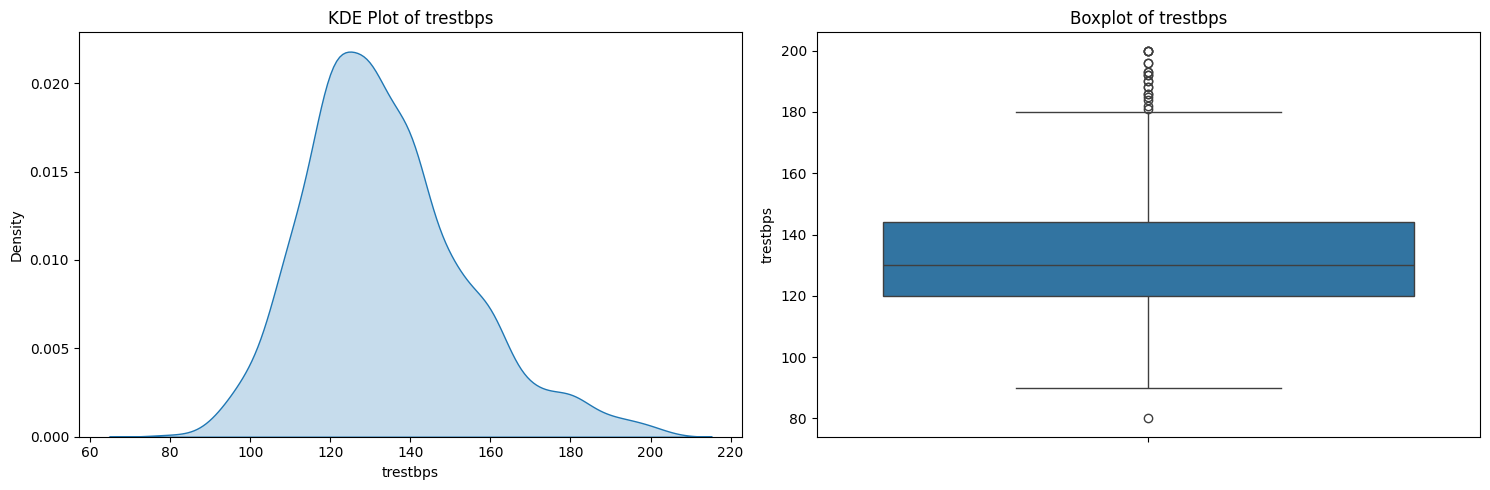

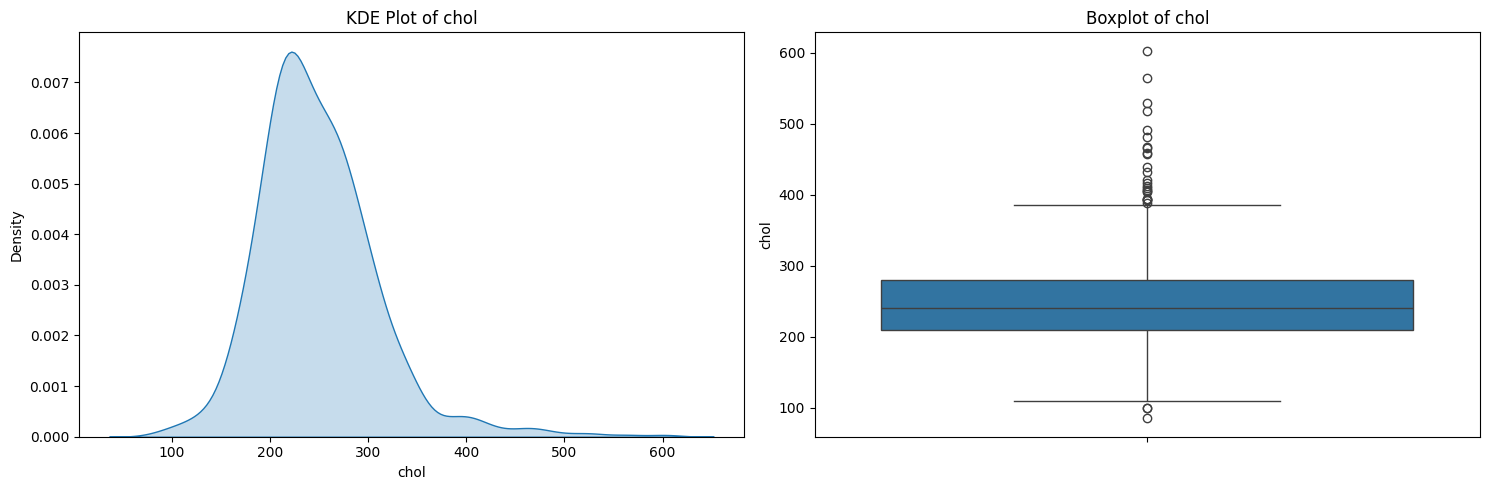

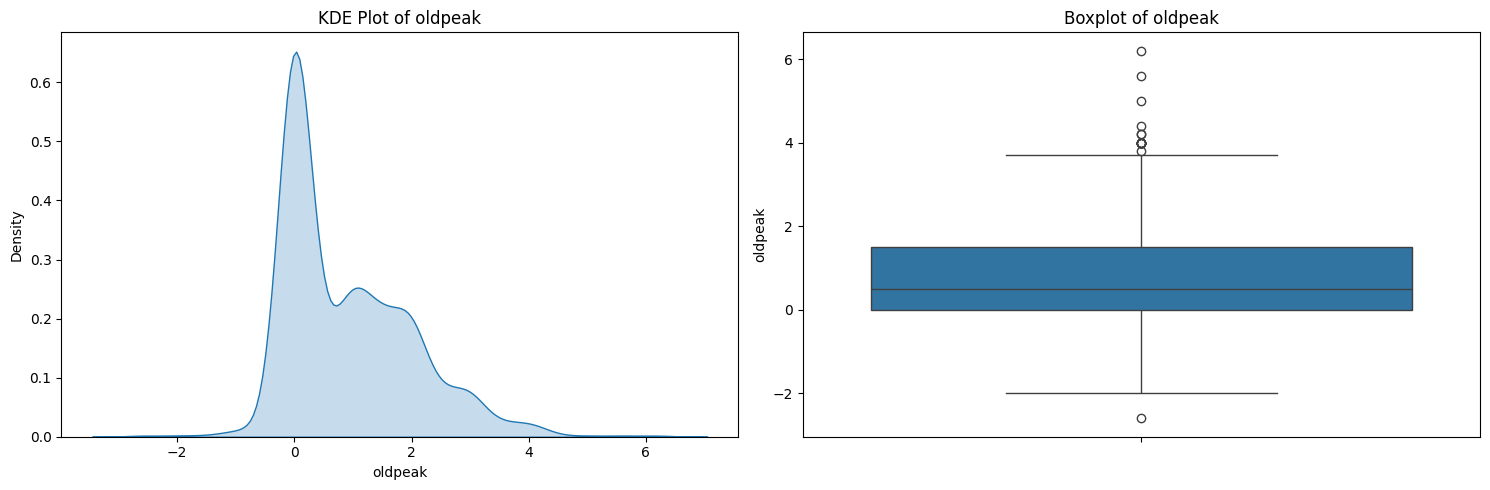

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_plot = ['trestbps', 'chol', 'oldpeak']

for col in columns_to_plot:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # KDE Plot
    sns.kdeplot(df[col].dropna(), fill=True, ax=axes[0])
    axes[0].set_title(f'KDE Plot of {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Density')

    # Boxplot
    sns.boxplot(y=df[col].dropna(), ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}')
    axes[1].set_ylabel(col)

    plt.tight_layout()
    plt.show()

As we can see, there are many outliers in the all three cols, so we impute value with the median.


# Model Building - MultiClass

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)

In [ ]:
X = df.drop('num', axis=1)
y = df['num']   # multi-class target

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
median_impute_cols = ['trestbps', 'chol', 'oldpeak']


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('median_imputer', SimpleImputer(strategy='median'), median_impute_cols)
    ],
    remainder='passthrough'
)


In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', DecisionTreeClassifier(
        criterion='gini',
        max_depth=8,
        min_samples_split=10,
        random_state=42
    ))
])


In [ ]:
pipeline.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('median_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['trestbps', 'chol',
                                                   'oldpeak'])])),
                ('model',
                 DecisionTreeClassifier(max_depth=8, min_samples_split=10,
                                        random_state=42))])

In [ ]:
y_pred = pipeline.predict(X_test)


In [ ]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall   :", recall_score(y_test, y_pred, average='macro'))
print("F1-score :", f1_score(y_test, y_pred, average='macro'))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy : 0.521978021978022
Precision: 0.30074078650550995
Recall   : 0.32062055868659634
F1-score : 0.3083914605791587

Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.76      0.73        80
           1       0.44      0.51      0.47        53
           2       0.09      0.05      0.06        22
           3       0.26      0.29      0.27        21
           4       0.00      0.00      0.00         6

    accuracy                           0.52       182
   macro avg       0.30      0.32      0.31       182
weighted avg       0.48      0.52      0.50       182



The accuracy that we have observed is quite low.
We can try to change a few things to improve accuracy.

In [ ]:
param_grid = {
    'model__max_depth': [3, 4, 5, 6, 7, None],
    'model__min_samples_split': [2, 5, 10, 15],
    'model__criterion': ['gini', 'entropy'],
    'model__class_weight': [None, 'balanced']
}


In [ ]:
from sklearn.metrics import make_scorer, f1_score
f1_macro_scorer = make_scorer(f1_score, average='macro')


In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=f1_macro_scorer,
    cv=5,          # 5-fold cross-validation
    n_jobs=-1,
    verbose=1
)


In [ ]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 96 candidates, totalling 480 fits


/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('median_imputer',
                                                                         SimpleImputer(strategy='median'),
                                                                         ['trestbps',
                                                                          'chol',
                                                                          'oldpeak'])])),
                                       ('model',
                                        DecisionTreeClassifier(max_depth=8,
                                                               min_samples_split=10,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'model__class_weight': [None, 'balanced'],
                         'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': [3, 4, 5, 6, 7, None],
                         'model__min_samples_split': [2, 5, 10, 15]},
             scoring=make_scorer(f1_score, response_method='predict', average=macro),
             verbose=1)

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)



Best Parameters: {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 2}
Best F1 Score: 0.3483960661191663


In [ ]:
y_pred = grid_search.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score

print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy on Test Set: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.76      0.74        80
           1       0.48      0.42      0.44        53
           2       0.07      0.05      0.05        22
           3       0.24      0.33      0.28        21
           4       0.00      0.00      0.00         6

    accuracy                           0.50       182
   macro avg       0.30      0.31      0.30       182
weighted avg       0.49      0.50      0.50       182



To improe accuracy, we can convert the problem from a multi-class classification to a binary classification problem.